**1.Загрузка и первичный обзор**


загрузить данные через pandas;

вывести первые/последние строки;

посмотреть структуру данных;

проверить типы данных и при необходимости привести их к корректным типам.



In [13]:
import pandas as pd

df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

print("первые 5 строк:")
print(df.head())

print("\n" + "-"*30 + "\n")

print("Последние 5 строк:")
print(df.tail())

# просмотр структуры данных
print("\n" + "-"*30 + "\n")

print("Info:")
df.info()

первые 5 строк:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80  

##Пропущенные значения

найти пропуски (isnull, isna);

посчитать количество пропусков по столбцам;

выбрать стратегию заполнения или удаления:

удаление строк/столбцов;

заполнение медианой/средним/модой/значениями по группам.

##Способ 1
median_score, inplace=True

In [14]:
import numpy as np

missing_values_count = df.replace('?', np.nan).isnull().sum()
print("Пропуски до обработки:")
print(missing_values_count)

print("\n" + "-"*30 + "\n")

mode_sleep_disorder = df['Sleep Disorder'].mode()[0]
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(mode_sleep_disorder)

print("Пропущенные значения после обработки:")
print(df.isnull().sum())

print("\n" + "-"*30 + "\n")

print("Info (после обработки пропусков):")
df.info()

Пропуски до обработки:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

------------------------------

Пропущенные значения после обработки:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

------------------------------

Info (после обработки пропусков):
<class 'pandas.core.frame.DataFra

##Дубликаты

найти дубликаты (duplicated);

вывести количество дублирующихся строк;

удалить их при необходимости (drop_duplicates)


In [15]:
print("Количество повтор. строк до удаления:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("\n" + "-"*30 + "\n")

print("Количество повтор. строк после удаления:")
print(df.duplicated().sum())

print("\n" + "-"*30 + "\n")

print("После удаления дубликатов:")
print(df.shape)

Количество повтор. строк до удаления:
0

------------------------------

Количество повтор. строк после удаления:
0

------------------------------

После удаления дубликатов:
(374, 13)


##Выбросы (при необходимости)

с помощью z-score из numpy;

визуально (boxplot).


Количество выявленных выбросов > 3.0: 9

------------------------------



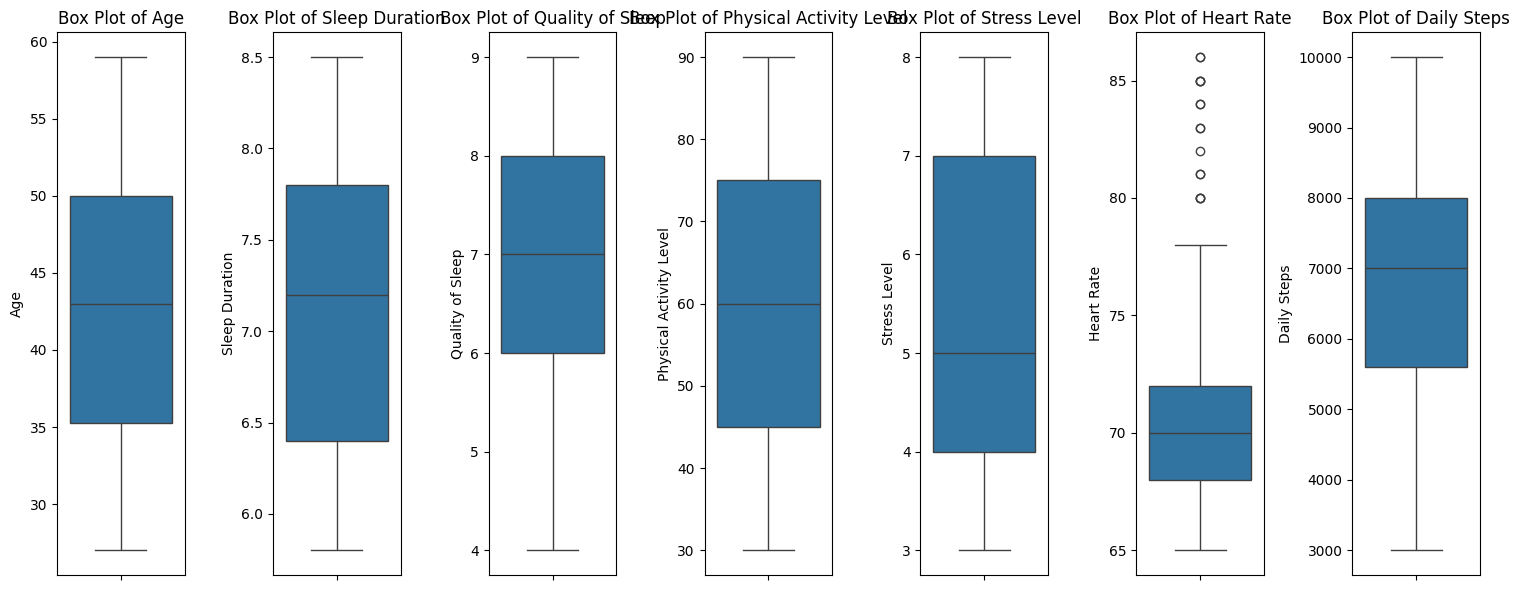

In [18]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

df_zscore = df[numerical_cols].apply(lambda x: np.abs(stats.zscore(x)))


outlier_threshold = 3.0
# общепринятая мера 3.0

outliers = df[(df_zscore > outlier_threshold).any(axis=1)]

print(f"Количество выявленных выбросов > {outlier_threshold}: {len(outliers)}")

print("\n" + "-"*30 + "\n")

plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


##Статистики данных:
описательная статистика (describe);

подсчёт уникальных значений, частоты;

корреляционный анализ (corr).


Статистика:
         Person ID Gender         Age Occupation  Sleep Duration  \
count   374.000000    374  374.000000        374      374.000000   
unique         NaN      2         NaN         11             NaN   
top            NaN   Male         NaN      Nurse             NaN   
freq           NaN    189         NaN         73             NaN   
mean    187.500000    NaN   42.184492        NaN        7.132086   
std     108.108742    NaN    8.673133        NaN        0.795657   
min       1.000000    NaN   27.000000        NaN        5.800000   
25%      94.250000    NaN   35.250000        NaN        6.400000   
50%     187.500000    NaN   43.000000        NaN        7.200000   
75%     280.750000    NaN   50.000000        NaN        7.800000   
max     374.000000    NaN   59.000000        NaN        8.500000   

        Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
count         374.000000               374.000000    374.000000          374   
unique    

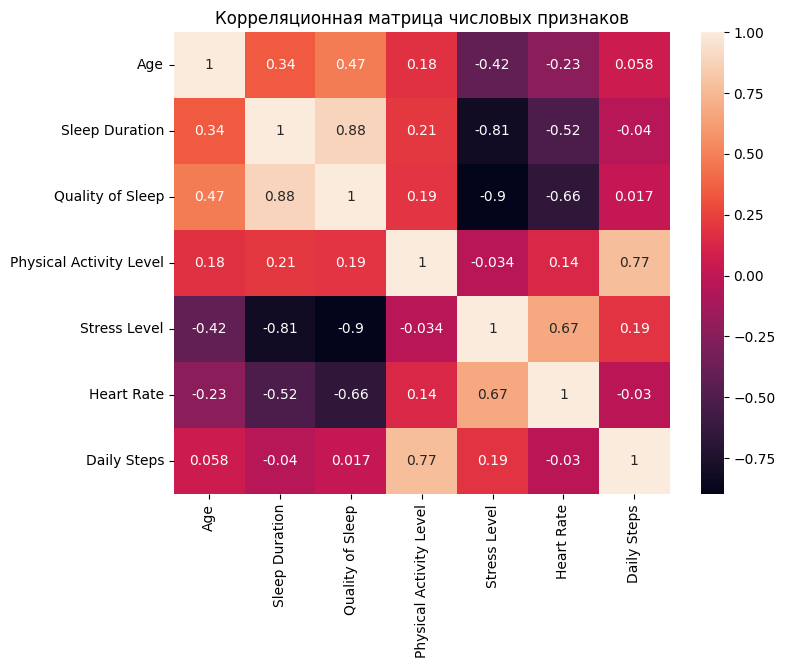

In [29]:
print("\nСтатистика:")
print(df.describe(include='all'))

print("\n" + "-"*30 + "\n")

print("Уникальные значения для 'Gender':")
print(df['Gender'].value_counts())

print("\n" + "-"*30 + "\n")

numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
correlation_matrix = df[numerical_cols].corr()
print("Корреляционная матрица для числовых столбцов:")
print(correlation_matrix)

print("\n" + "-"*30 + "\n")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Корреляционная матрица числовых признаков')
plt.show()

##Визуализация данных
Нужно построить минимум 5 графиков:

гистограммы распределений;

линейный график;

столбчатые диаграммы;

boxplot;

heatmap корреляций.

Можно использовать: matplotlib, seaborn, plotly.

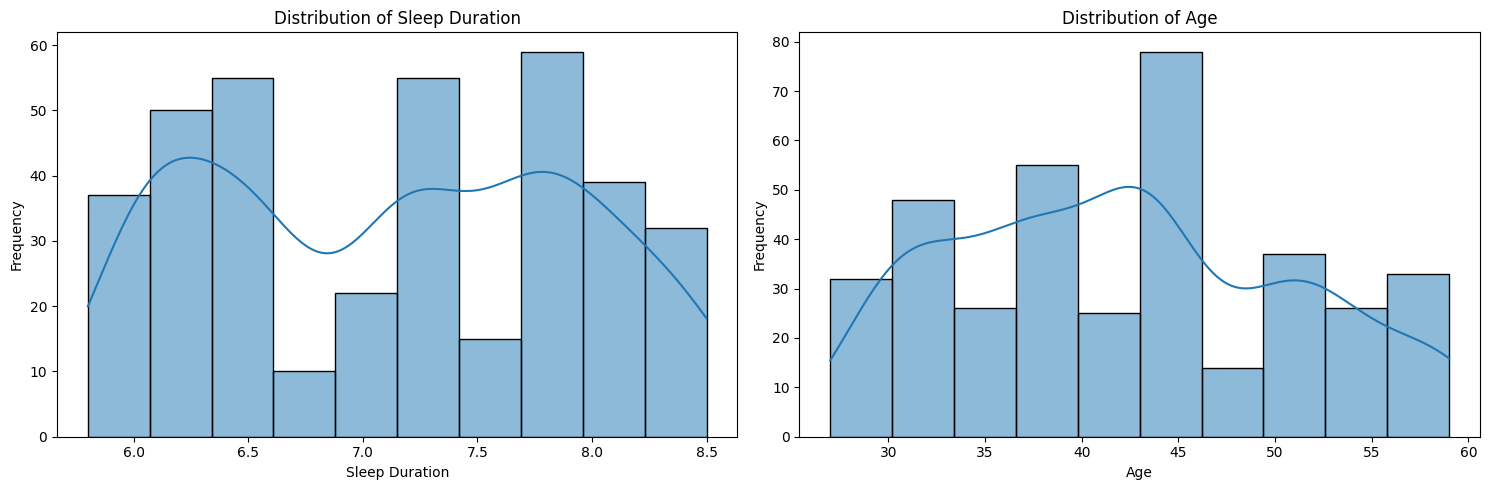

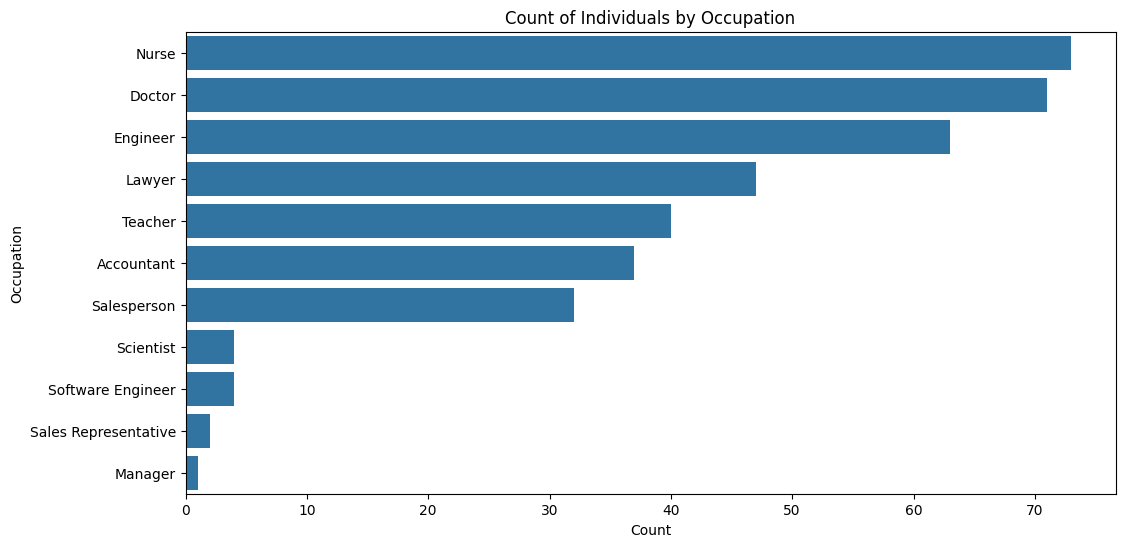

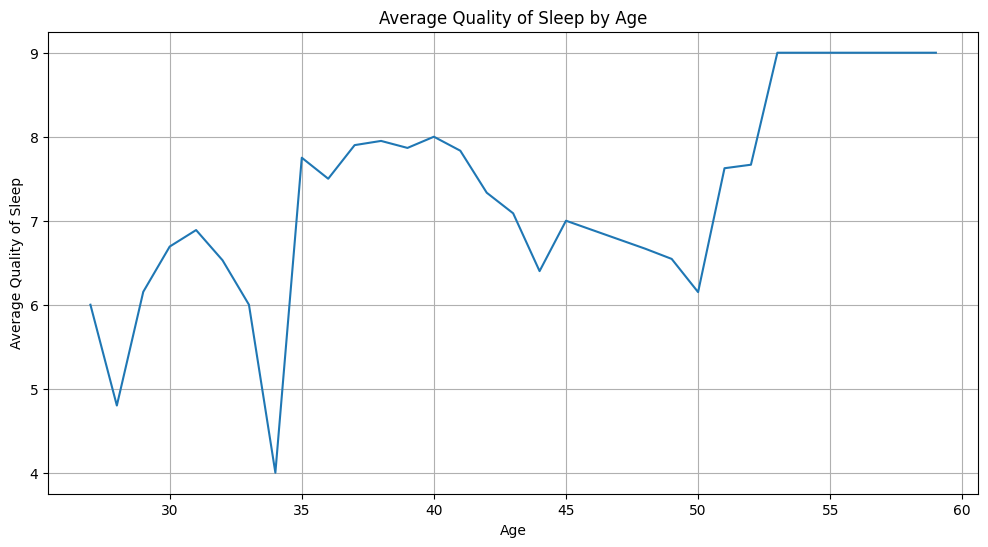

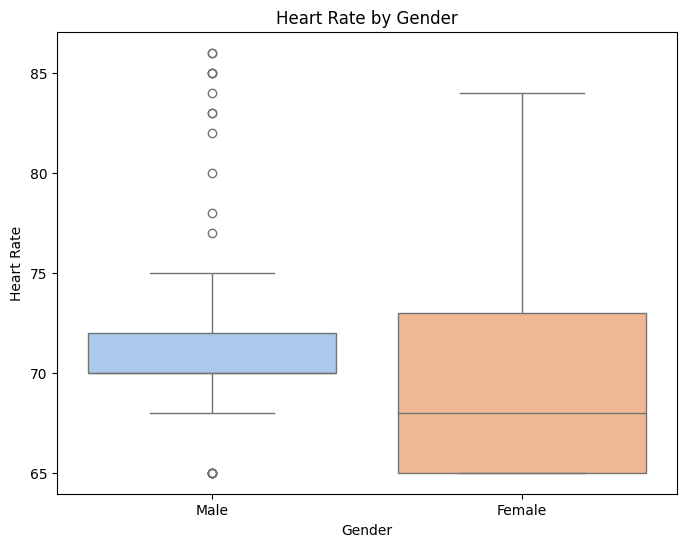

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Гистограммы распределений числовых столбцов (пример)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Sleep Duration'], bins=10, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Столбчатая диаграмма для подсчета уникальных значений по 'Occupation'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Occupation', order=df['Occupation'].value_counts().index, legend=False)
plt.title('Count of Individuals by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

# 3. Линейный график - среднее 'Quality of Sleep' по 'Age'
avg_quality_by_age = df.groupby('Age')['Quality of Sleep'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_quality_by_age, x='Age', y='Quality of Sleep')
plt.title('Average Quality of Sleep by Age')
plt.xlabel('Age')
plt.ylabel('Average Quality of Sleep')
plt.grid(True)
plt.show()

# 4. Boxplot для 'Heart Rate' по 'Gender'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Heart Rate', hue='Gender', legend=False)
plt.title('Heart Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Heart Rate')
plt.show()



In [26]:
print("\nсреднее по группам:")
avg_stats_by_gender = df.groupby('Gender')[['Sleep Duration', 'Quality of Sleep', 'Heart Rate']].mean()
print(avg_stats_by_gender)

print("\nмедиана по группам:")
median_stats_by_occupation = df.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep', 'Heart Rate']].median()
print(median_stats_by_occupation.head())

print("\nподсчёт количества:")
count_by_bmi = df.groupby('BMI Category').size().rename('count')
print(count_by_bmi)

print("\n" + "-"*30 + "\n")

print("суммирование:")
total_daily_steps_by_gender = df.groupby('Gender')['Daily Steps'].sum()
print(total_daily_steps_by_gender)

print("\n" + "-"*30 + "\n")

print("построение сводной таблицы")
pivot_table_sleep = pd.pivot_table(df, values='Sleep Duration', index='Occupation', columns='Gender', aggfunc='mean')
print(pivot_table_sleep.head())

print("\n" + "-"*30 + "\n")

avg_stress_gender_bmi = df.groupby(['Gender', 'BMI Category'])['Stress Level'].mean().unstack()
print(avg_stress_gender_bmi)


среднее по группам:
        Sleep Duration  Quality of Sleep  Heart Rate
Gender                                              
Female        7.229730          7.664865   69.259459
Male          7.036508          6.968254   71.052910

медиана по группам:
            Sleep Duration  Quality of Sleep  Heart Rate
Occupation                                              
Accountant             7.2               8.0        68.0
Doctor                 7.6               7.0        70.0
Engineer               8.3               9.0        65.0
Lawyer                 7.3               8.0        68.0
Manager                6.9               7.0        75.0

подсчёт количества:
BMI Category
Normal           195
Normal Weight     21
Obese             10
Overweight       148
Name: count, dtype: int64

------------------------------

суммирование:
Gender
Female    1265500
Male      1284000
Name: Daily Steps, dtype: int64

------------------------------

построение сводной таблицы
Gender        Female 